In [25]:
import numpy as np
import decimal as dec
import math
from sys import maxsize
import mpmath as mp
import matplotlib.pyplot as plt



f1 = lambda x: mp.cos(x)*mp.cosh(x) - 1
f2 = lambda x: 1/x - mp.tan(x) if x != 0 else maxsize
f3 = lambda x: 2**(-x) + mp.exp(x) + 2*mp.cos(x) - 6
f1d = lambda x: mp.cos(x)*mp.sinh(x) - mp.sin(x)*mp.cosh(x)
f2d = lambda x: -1/(x**2) - 1/(mp.cos(x)**2) if x!= 0 else (-1) * maxsize
f3d = lambda x: mp.exp(x) - (2**(-x)*mp.log(2) -2*mp.sin(x))
funcs = [f1, f2, f3]
funcsD = [f1d, f2d, f3d]
intervals = [(3/2*math.pi, 2*math.pi), (1e-2, math.pi/2 - 1e-2), (1,3)]
precisions = [math.pow(10,-7), math.pow(10, -15), math.pow(10, -33)]
DEC = mp.mpf




def bisection(f, a, b, precision, E):
    mp.mp.dps = precision

    if mp.sign(f(a)) == mp.sign(f(b)):
        print("no root")
        return (maxsize, maxsize)

    middle = DEC(a) + (DEC(b)-DEC(a))/2
    numOfSteps = 0
    while abs(DEC(a) - DEC(b)) > E:
        middle = DEC(a) + (DEC(b)-DEC(a))/2
        if mp.sign(f(middle)) != mp.sign(f(a)):
            b = middle
        else:
            a = middle
        numOfSteps += 1

    return (middle, numOfSteps)


def newTon(f, fd, precision, E, maxIterations, a, b):
    mp.mp.dps = precision
    a = DEC(a)
    b = DEC(b)

    iterator = 0
    middle = DEC(a) + (DEC(b) - DEC(a))/2

    if mp.sign(f(a)) == mp.sign(f(b)):
        print("no root")
        return maxsize, maxsize

    while abs(f(middle)) > E and iterator < maxIterations:
        middle = DEC(middle) - (DEC(f(middle))/DEC(fd(middle)))
        iterator += 1
    
    return middle, iterator


def secant(f, precision, maxIterations, E, a, b):
    mp.mp.dps = precision
    
    if mp.sign(f(a)) == mp.sign(f(b)):
        print("no root")
        return (maxsize, maxsize)
    
    a = DEC(a + 1e-4)
    b = DEC(b - 1e-4)

    iterator = 0
    
    while abs(DEC(a) - DEC(b)) > E and maxIterations > iterator:
        middle = DEC(b) - f(b) * (DEC(b)-DEC(a))/(f(b) - f(a))
        a = b
        b = middle

    return middle, iterator
    
print("")
print("newton:")
for precision in precisions:

    print("")
    print("precision: ", precision)
    for i in range(3):
        root, steps = newTon(funcs[i], funcsD[i], 64, precision, 50, intervals[i][0], intervals[i][1])
        print("root: ", root)
        print("steps: ", steps)

print("")
print("secant:")
for precision in precisions:

    print("precision: ", precision)
    print("")
    for i in range(3):
        root, steps = secant(funcs[i], 64, 50, precision, intervals[i][0], intervals[i][1])
        print("root: ", root)
        print("steps: ", steps)

    
print("")
print("bisection:")
for precision in precisions:

    print("precision: ", precision)
    print("")
    for i in range(3):
        root, steps = bisection(funcs[i], intervals[i][0], intervals[i][1], 64, precision)
        print("root: ", root)
        print("steps: ", steps)


    
# Liczba iteracji podana niżej


newton:

precision:  1e-07
root:  4.730040744909009636939848241278818078491903393648564871635353663
steps:  5
root:  0.8603335890193820717148777835700785264263644913219722457710074091
steps:  3
root:  1.829383622289802338551876674858229800246285842117958044693853801
steps:  22

precision:  1e-15
root:  4.730040744862704026026154791516518135085645299565356174796202126
steps:  6
root:  0.8603335890193797624838934241393365957501783499876240268891482545
steps:  4
root:  1.829383601933848956658125292773854965407620518582137940792792151
steps:  48

precision:  1e-33
root:  4.730040744862704026024048100833884819898346161194761029832839056
steps:  7
root:  0.860333589019379762483893424137662333411884363237653783003382166
steps:  5
root:  1.829383601933848849994025583751627231993907869042975174050202763
steps:  50

secant:
precision:  1e-07

root:  4.730040744862704069404648202861064123561809238970032603376260811
steps:  0
root:  0.86033358901938295616654769462005750211677595617496543435024522

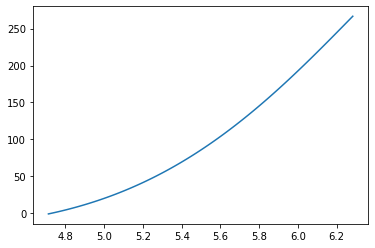

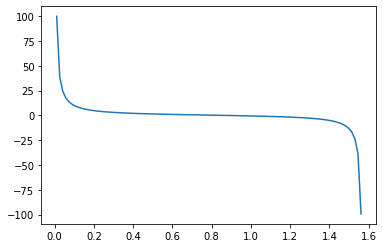

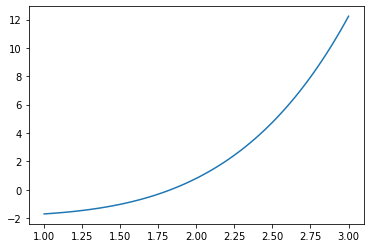

In [26]:
for i in range(3):
    X = np.linspace(intervals[i][0], intervals[i][1], 100)
    Y = [funcs[i](x) for x in X]
    plt.plot(X,Y)
    plt.show()